### Feature map visualization (PyTorch)

OmniXAI provides a simple explainer for visualizing feature maps of a specified layer.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import os
import torch
from torchvision import models, transforms
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.explainers.vision.specific.feature_visualization.visualizer import \
    FeatureMapVisualizer

Let's load a test image:

In [3]:
img = Image(PilImage.open("../data/images/dog_cat.png").convert("RGB"))

Here we choose the ResNet50 model for demonstration (you may test other CNN models, e.g., VGG). The preprocessing function converts the image input (an `Image` instance) into the model input.

In [4]:
model = models.resnet50(pretrained=True)
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

/Users/thewelcomer/Coding/CV-IS-Fall-2024/OmniXAI/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/Users/thewelcomer/Coding/CV-IS-Fall-2024/OmniXAI/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.



We then create a `FeatureMapVisualizer` explainer by setting the model, the target layer to analyze and the preprocessing function.

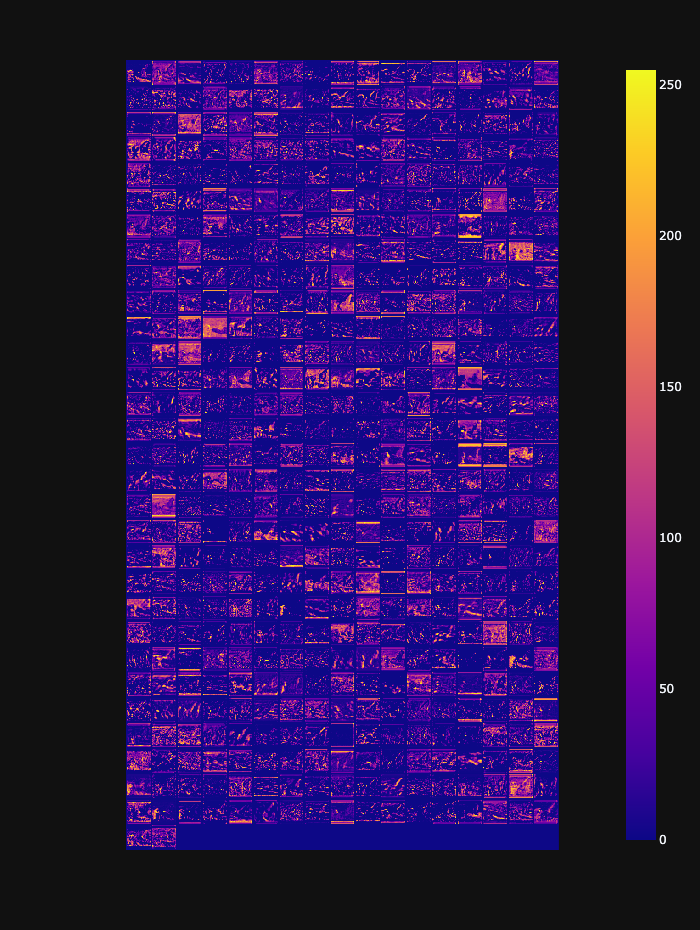

In [5]:
explainer = FeatureMapVisualizer(
    model=model,
    target_layer=model.layer2[-1],
    preprocess_function=preprocess
)
explanations = explainer.explain(img)
explanations.ipython_plot()